# CS231n_13: Generative Models

1. Unsupervised Learning  
2. Generative Models  
3. pixelRNN/CNN  
4. Variational AutoEncoders(VAE)  
5. Generative Adversarial Networks(GAN)  

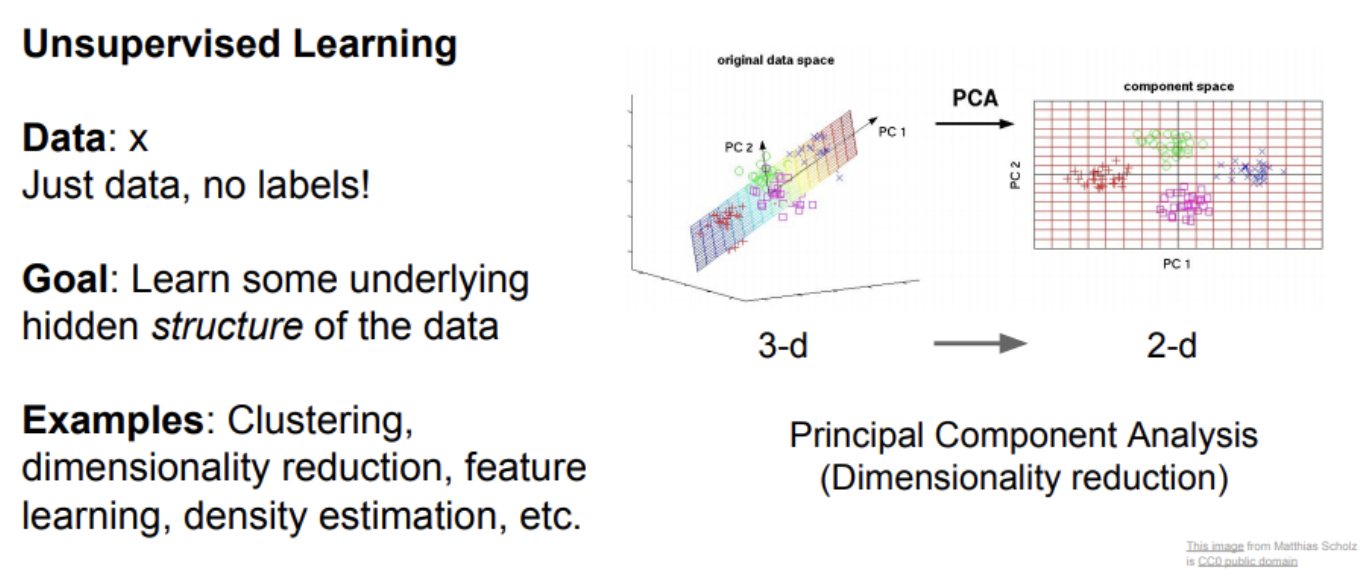

비지도 학습은 레이블 없이 학습 데이터만 가지고 데이터에 숨겨져 있는 구조나 특성을 학습하는 것이다.  
예시로는 군집화, 차원축소, 특성 학습 등이 있다.

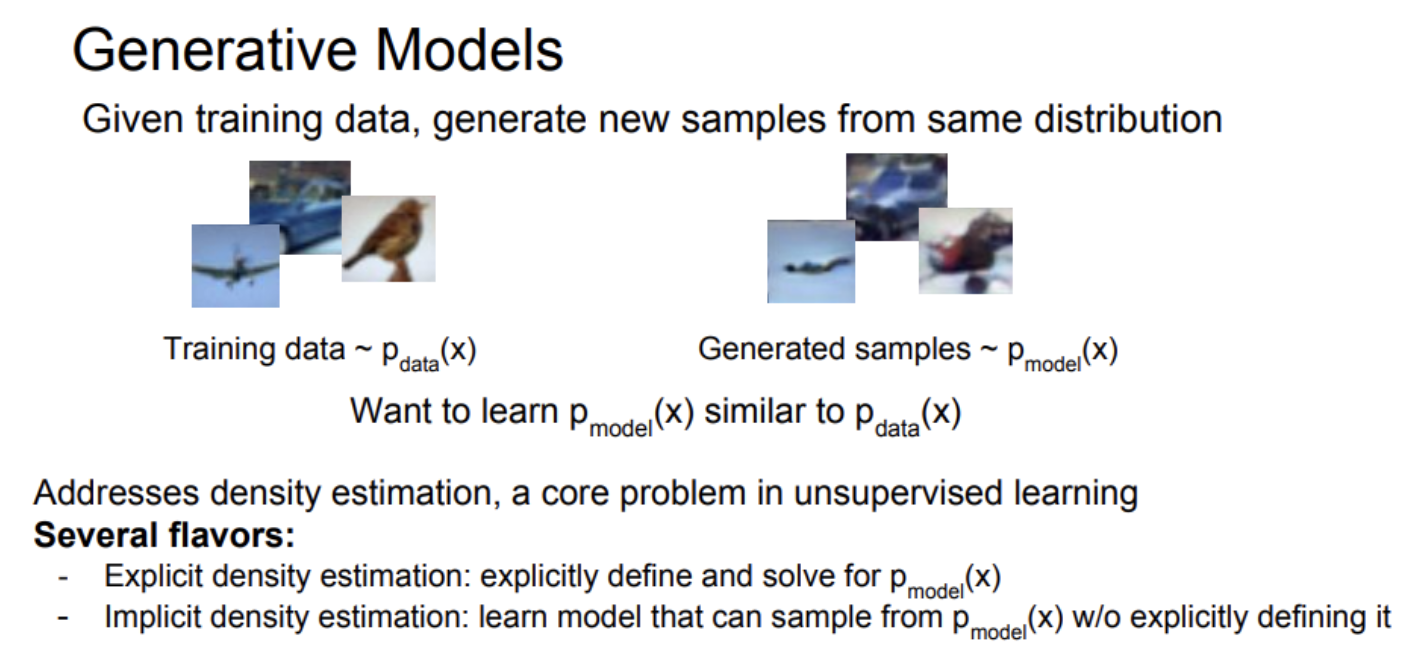

생성 모델: train data로 학습된 분포를 기반으로 비슷한 분포를 가지는 새로운 data를 생성  


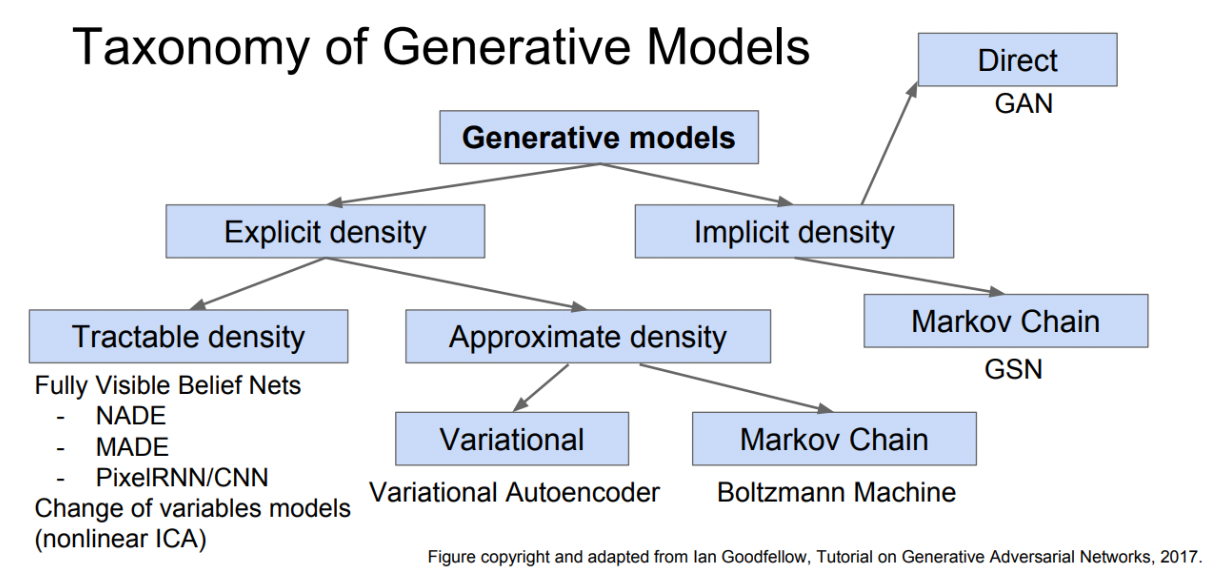

생성 모델은 explicit 방법과 implicit으로 나뉘는데  
두 개의 차이점은 모델에 대한 확률변수를 구하는지에 따라 나뉜다.(explicit이 구하는 쪽)  

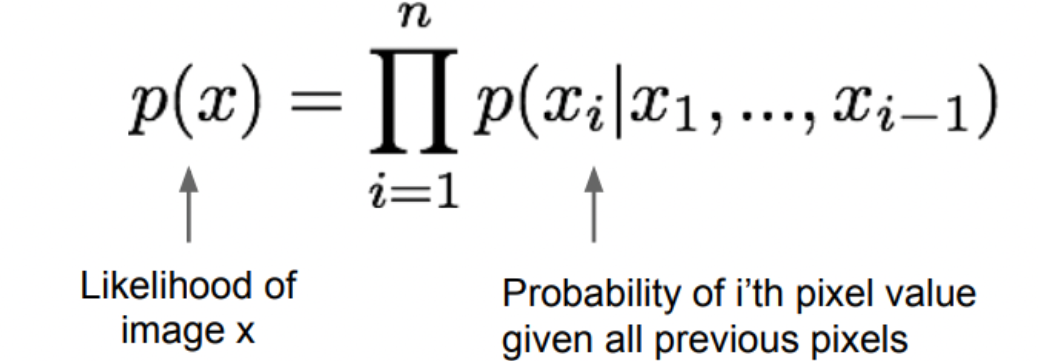

Explicit density는 $p_{model(x)}$이 어떤 분포를 띄는지 정의하는데 초점을 두며 training data의 p(x)를 높이는 방향으로 학습함.  
위의 식처럼 해당 pixel들로 구성된 이미작 나타날 확률은 각 pixel들의 확률곱임

모델을 정의하는데는 한계가 있기에 Implicit density 방법, 그 중에서도 GAN을 많이 쓴다.  
Implicit density: 정의를 하기보단 결과(sample)을 생성할 수 있냐에 관심이 있음.  

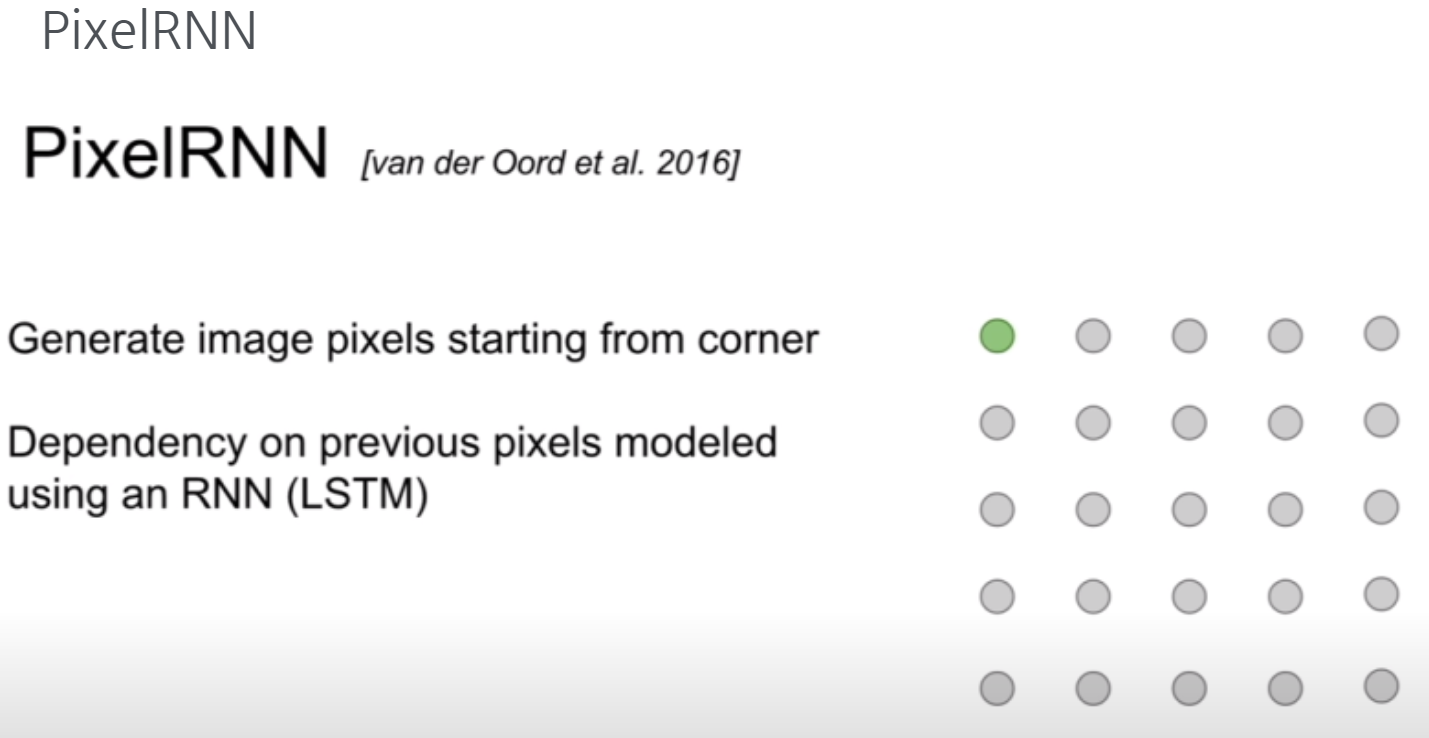

Pixel RNN: 픽셀RNN은 코너부터 생성을 시작하고 이전 픽셀의 특징을 RNN(LSTM)을 사용하여 모델링 함. (느림)

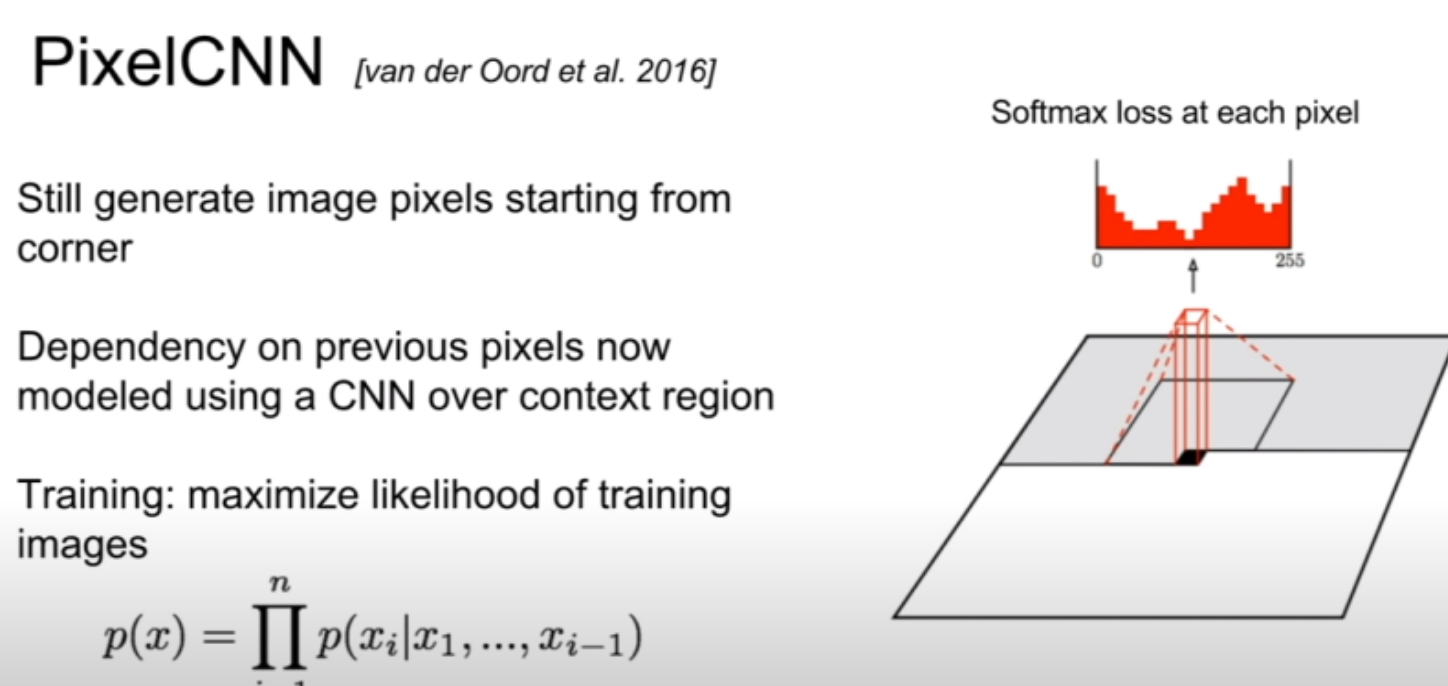

똑같은 이미지를 비슷한 방식으로 생성하지만 CNN을 사용한다는 점이 다르다.  
특징: CNN over context region으로 모델링 된 이전 픽셀에 의존, 모든 픽셀의 위치에서 training data의 likelihood의 최대화가 목표.  

### Auto encoder  
레이블이 없는 데이터에서 feature representation을 추출하는 비지도 학습

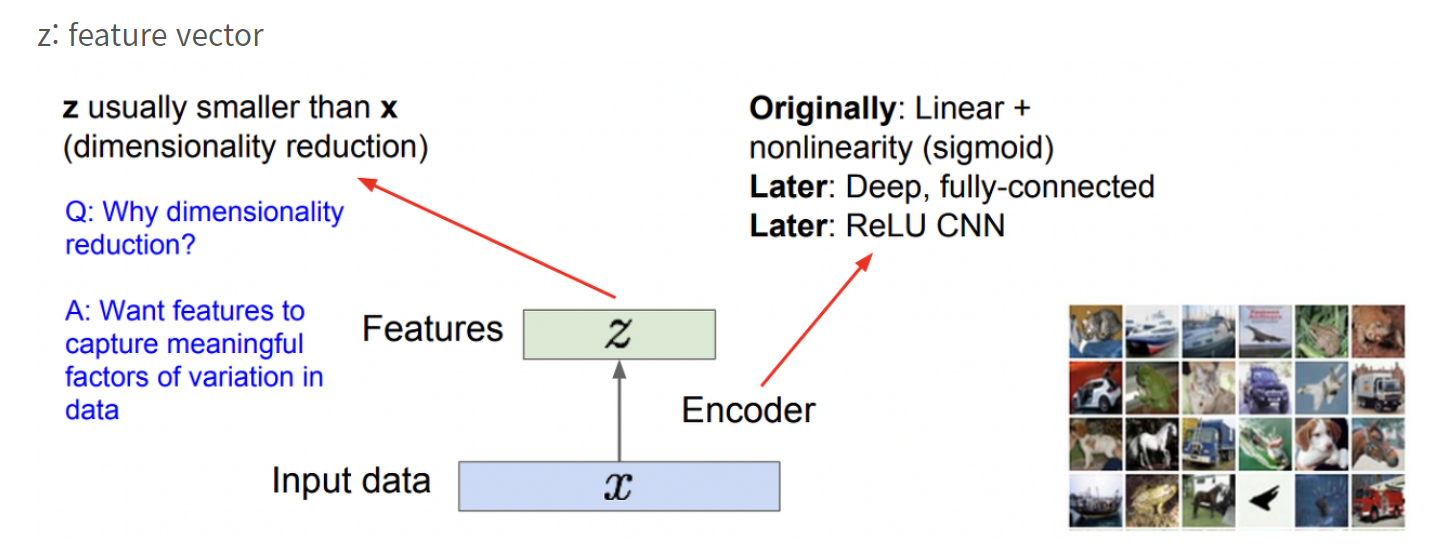

input에서 차원 축소(의미있는 요소만 추출)를 하여 z를 뽑아낸다.

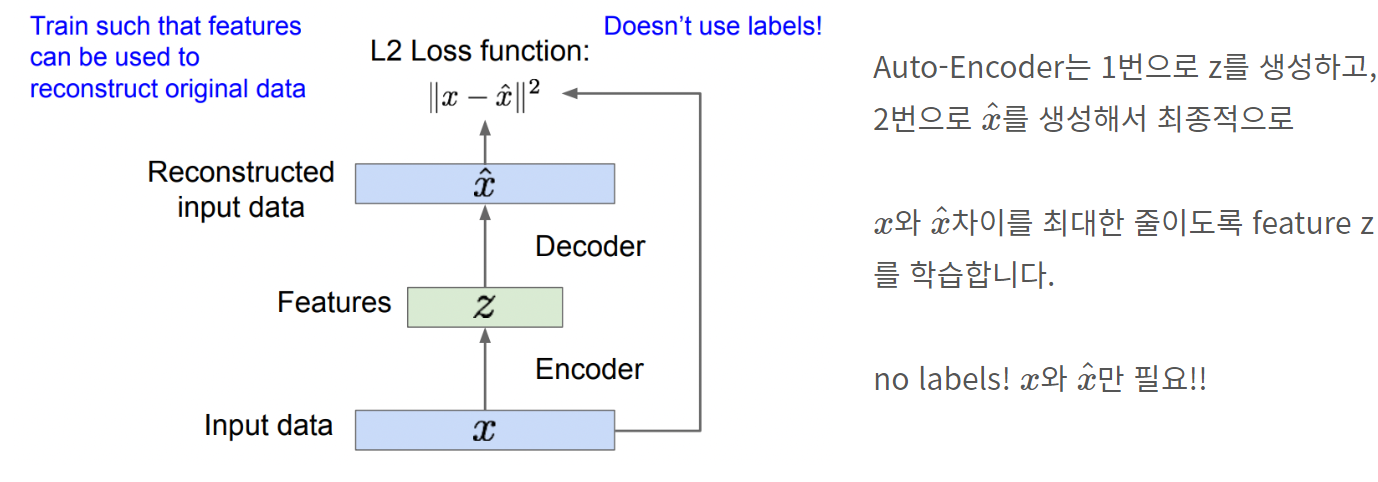

z에서 다시 $\hat x$을 다시 만들어내고 L2 distance로 손실을 계싼해서 x와 $\hat x$의 차이를 최대한 줄이도록 z를 학습한다

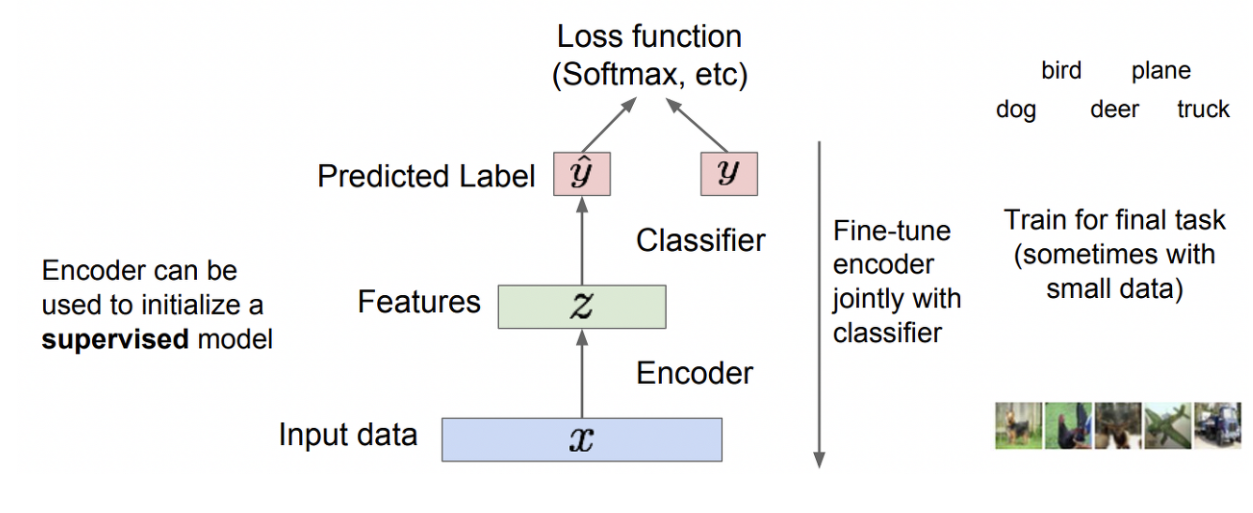

학습 후에는 decoder는 버려지고 feature z만 남음.  
이 feature z가 input data의 특성을 잘 추출하게 하는 것이 Auto Encoder의 목표.  
마지막으로 classification하는데 z가 사용되고 끝.  
여기서 복잡하게 classification을 하는 이유는 data가 적을 떄 과대, 과소 적합을 막기 위해서임.

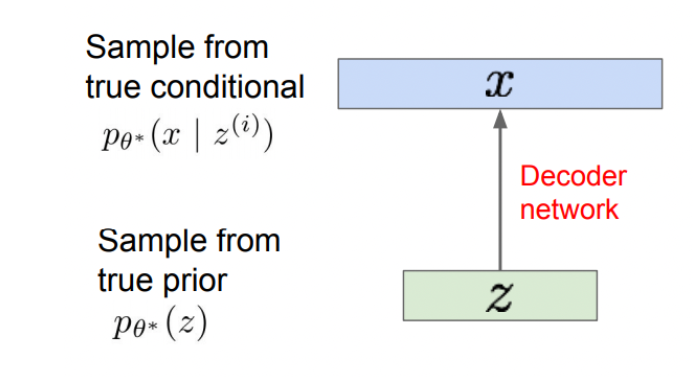

다시 돌아온 VAE.  
VAE는 추출한 feature로 새로운 이미지를 생성  
* $z$: latent vector  
* $p\theta * (z)$: parameter가 
$\theta$
일때, latent vector $z$를 sampling 할 수 있는 확률밀도함수  
* $p\theta(x|z)$: parameter가 
$\theta$
이면서, z가 주어졌을 때 x를 생성해내는 확률밀도함수  
여기서 $\theta$가 실제 분포와 비슷하게 되는 것을 찾는 것이 목표  
하지만 모든 featrue z에 대해 적분을 취할 수 없는 intractable한 문제가 있음. 그래서 VAE 방식이 있는 것.

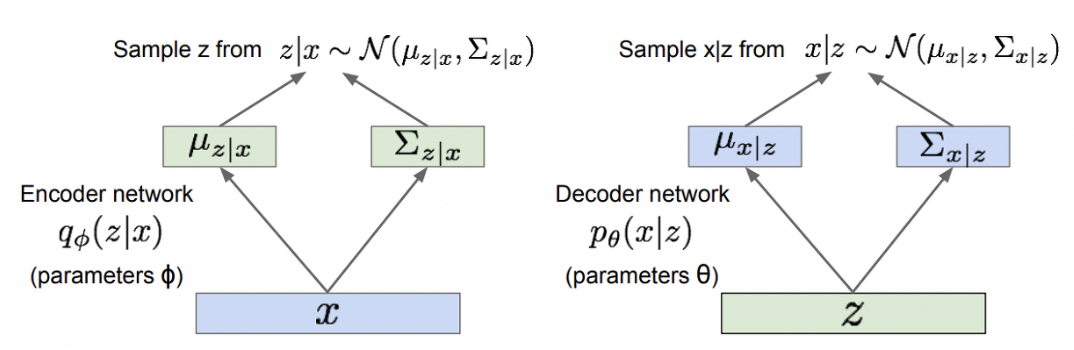

Encoder와 Decoder 구조로 된 VAE 네트워크

## GAN

GAN은 앞서 말했듯이 Sample을 얻는데 집중하는 방법이다.  
GAN을 구현하기 위핸 아래의 두 가지 네트워크가 필요  
* Generator Network: Discriminator를 속여 실제와 비슷하게 보이는 이미지를 만들어 내는 것이 목표  
* Discriminator Network: 진짜와 가짜를 구별  


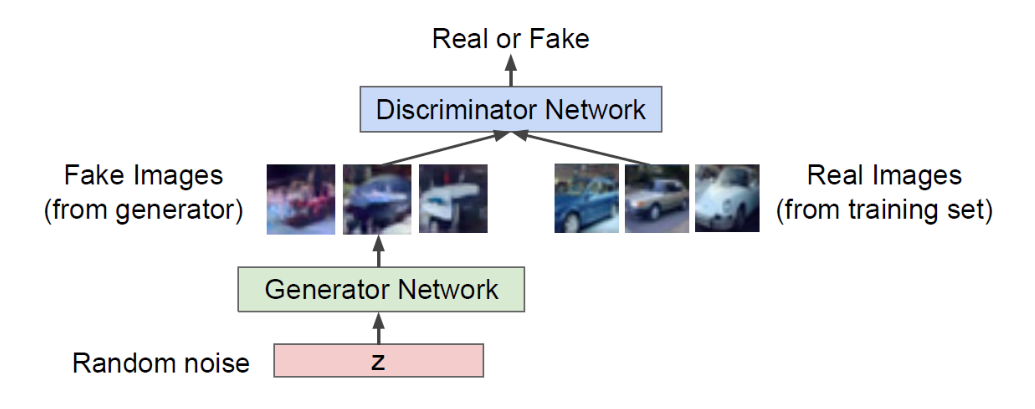

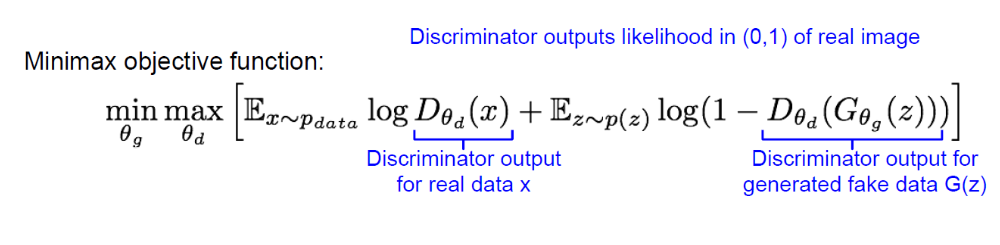

위는 GAN의 objetive function이다.  
discriminator와 Generator을 번갈아 가면서 학습

테스트를 할 때는 Generator Network를 이용하여 테스트한다.

## CNN과 GAN을 합성한 DCGAN

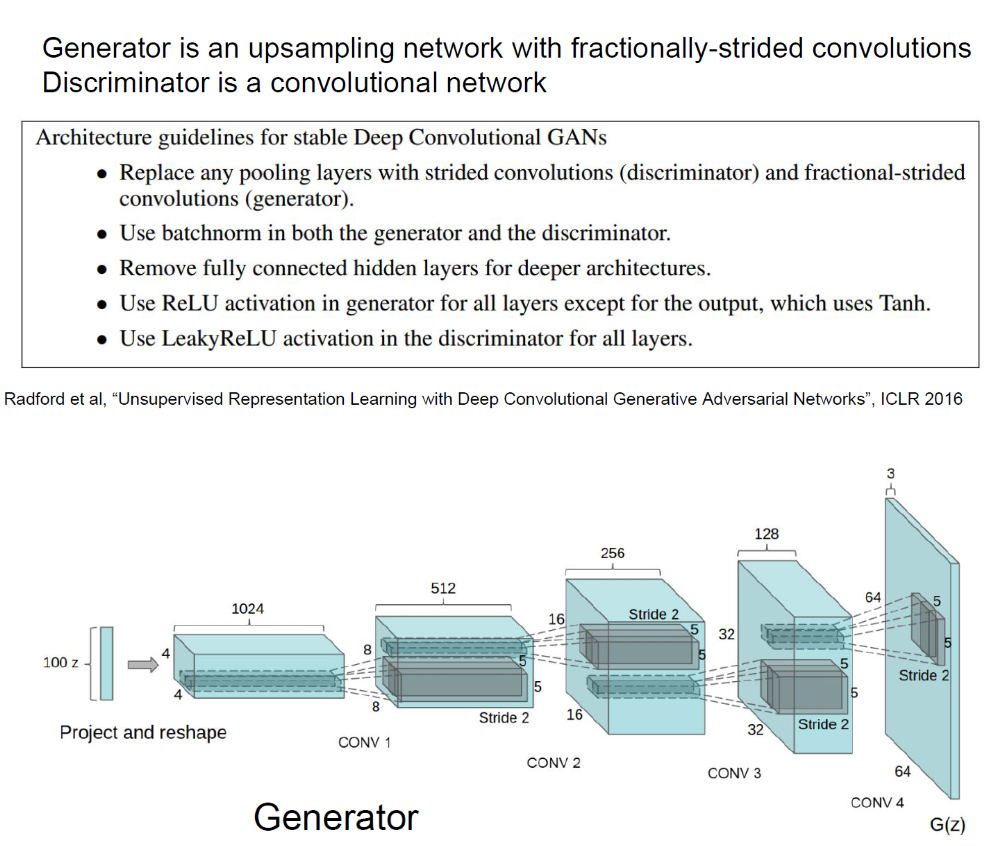

자세한 내용은 GAN ZOO 참고